Step 1: Load the Data

In [87]:
import pandas as pd

# Load the data
surgery_df = pd.read_csv('/content/surgery.csv')
equipment_df = pd.read_csv('/content/equipment.csv')
preference_card_df = pd.read_csv('/content/preference_card.csv')


Step 2: Data Preprocessing

a. Data Cleaning

In [89]:
print("Surgery Data:")
print(surgery_df.head())
print("\nEquipment Data:")
print(equipment_df.head())
print("\nPreference Card Data:")
print(preference_card_df.head())

# Check for missing values
print("\nMissing values in Surgery Data:")
print(surgery_df.isnull().sum())
print("\nMissing values in Equipment Data:")
print(equipment_df.isnull().sum())
print("\nMissing values in Preference Card Data:")
print(preference_card_df.isnull().sum())

# Check for unique values in surgery_id and equipment_id to ensure consistency
print("\nUnique Surgery IDs:")
print(surgery_df['surgery_id'].unique())
print("\nUnique Equipment IDs:")
print(equipment_df['equipment_id'].unique())
print("\nUnique Surgery IDs in Preference Card Data:")
print(preference_card_df['surgery_id'].unique())

# Check for duplicate entries
print("\nDuplicate entries in Surgery DataFrame:", surgery_df.duplicated().sum())
print("Duplicate entries in Equipment DataFrame:", equipment_df.duplicated().sum())
print("Duplicate entries in Preference Card DataFrame:", preference_card_df.duplicated().sum())


# Ensure IDs match between tables (example for surgery_id)
print("\nUnique surgery IDs in Preference Card DataFrame:")
print(preference_card_df['surgery_id'].unique())

print("\nUnique surgery IDs in Surgery DataFrame:")
print(surgery_df['surgery_id'].unique())

# Check if all surgery IDs in surgery_df are present in preference_card_df
missing_surgeries = set(surgery_df['surgery_id']) - set(preference_card_df['surgery_id'])

# Print a message depending on whether missing IDs were found
if missing_surgeries:
    print("\nMissing surgery IDs in Preference Card DataFrame:", missing_surgeries)
else:
    print("\nAll surgery IDs in Surgery DataFrame are present in Preference Card DataFrame.")



Surgery Data:
   surgery_id      surgery_type        date
0        1002           Cardiac  2023-07-14
1        1001           General  2023-03-12
2        1004  Gastrointestinal  2023-05-26
3        1002           General  2023-04-20
4        1007  Gastrointestinal  2023-05-12

Equipment Data:
   equipment_id   equipment_name equipment_type
0             1          Sutures       Reusable
1             2   Scalpel Blades     Disposable
2             3  Surgical Gloves     Disposable
3             4  Surgical Drapes     Disposable
4             5    Suction Tubes     Disposable

Preference Card Data:
  preference_card_id  surgery_id            equipment_ids    quantities_needed
0              S1002        1002              13,11,9,8,6            2,2,2,2,4
1              S1001        1001  10,13,4,3,9,1,12,15,8,2  2,2,2,5,5,2,5,1,4,2
2              S1004        1004     7,14,15,1,9,10,3,6,4    3,3,2,3,3,5,5,1,4
3              S1007        1007             5,6,4,2,1,13          1,1,2,3,4,1

In [90]:
#Drop duplicate values
surgery_df = surgery_df.drop_duplicates()

b. Data Transformation

In [91]:
# Convert 'date' column in surgery_df to datetime format
surgery_df['date'] = pd.to_datetime(surgery_df['date'], format='%Y-%m-%d')

# Split 'equipment_ids' and 'quantities_needed' in preference_card_df into lists
preference_card_df['equipment_ids'] = preference_card_df['equipment_ids'].apply(lambda x: list(map(int, x.split(','))))
preference_card_df['quantities_needed'] = preference_card_df['quantities_needed'].apply(lambda x: list(map(int, x.split(','))))

# Preview the updated DataFrames
print("\nUpdated Surgery DataFrame:")
print(surgery_df.head())

print("\nUpdated Preference Card DataFrame:")
print(preference_card_df.head())




Updated Surgery DataFrame:
   surgery_id      surgery_type       date
0        1002           Cardiac 2023-07-14
1        1001           General 2023-03-12
2        1004  Gastrointestinal 2023-05-26
3        1002           General 2023-04-20
4        1007  Gastrointestinal 2023-05-12

Updated Preference Card DataFrame:
  preference_card_id  surgery_id                       equipment_ids  \
0              S1002        1002                   [13, 11, 9, 8, 6]   
1              S1001        1001  [10, 13, 4, 3, 9, 1, 12, 15, 8, 2]   
2              S1004        1004      [7, 14, 15, 1, 9, 10, 3, 6, 4]   
3              S1007        1007                 [5, 6, 4, 2, 1, 13]   
4              S1005        1005              [12, 14, 11, 4, 15, 7]   

                quantities_needed  
0                 [2, 2, 2, 2, 4]  
1  [2, 2, 2, 5, 5, 2, 5, 1, 4, 2]  
2     [3, 3, 2, 3, 3, 5, 5, 1, 4]  
3              [1, 1, 2, 3, 4, 1]  
4              [3, 3, 1, 5, 2, 5]  


Step 3: Exploratory Data Analysis (EDA)

a. Data Visualization - Surgery Statistics

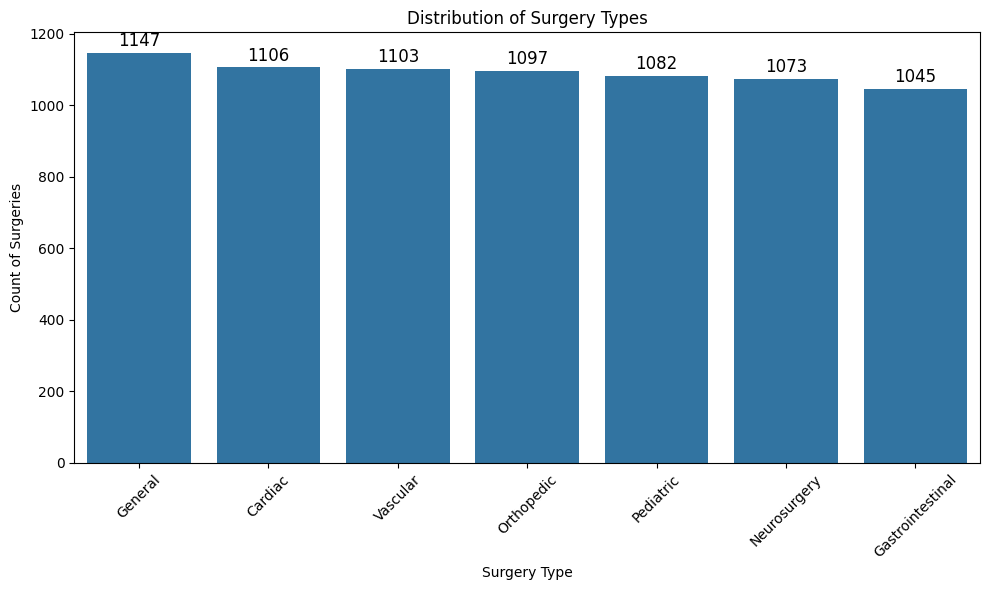

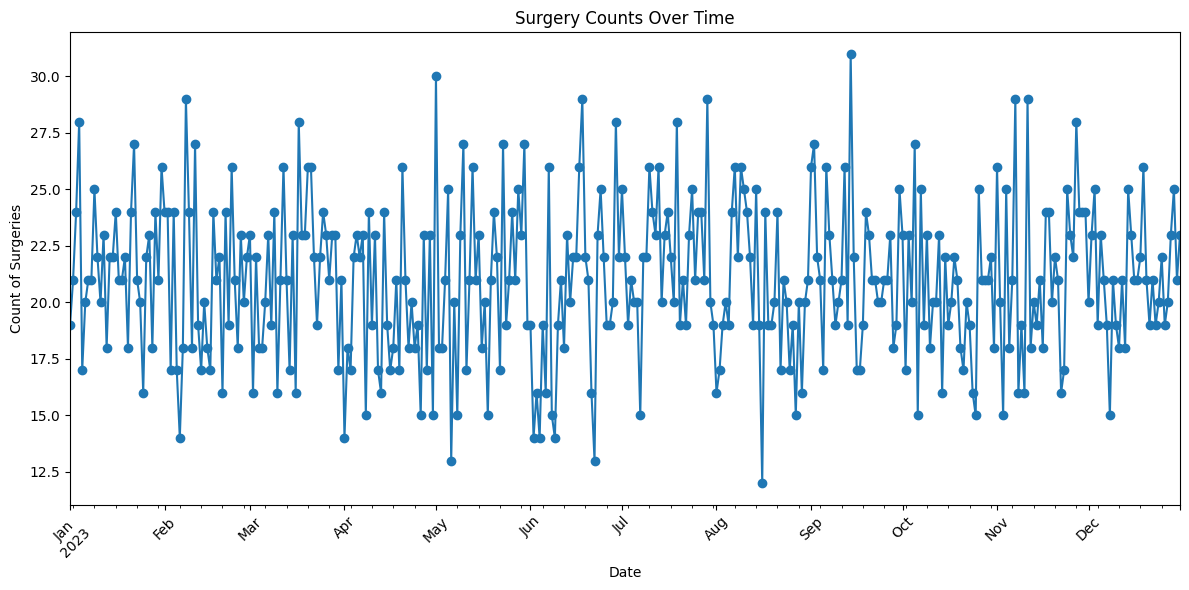

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for surgery types
plt.figure(figsize=(10, 6))  # Set the figure size
surgery_count_plot = sns.countplot(data=surgery_df, x='surgery_type', order=surgery_df['surgery_type'].value_counts().index)
plt.title("Distribution of Surgery Types")
plt.xlabel("Surgery Type")
plt.ylabel("Count of Surgeries")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add value labels above each bar
for p in surgery_count_plot.patches:
    surgery_count_plot.annotate(format(p.get_height(), '.0f'),
                                 (p.get_x() + p.get_width() / 2., p.get_height()),
                                 ha='center', va='baseline',
                                 fontsize=12, color='black',
                                 xytext=(0, 5),  # 5 points vertical offset
                                 textcoords='offset points')

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

# Plotting surgery counts over time
plt.figure(figsize=(12, 6))
surgery_counts = surgery_df.groupby('date').size()
surgery_counts.plot(kind='line', marker='o')
plt.title("Surgery Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Surgeries")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()


b. Descriptive Statistics

i) Average number of surgeries per day

In [93]:
surgery_df['date'] = pd.to_datetime(surgery_df['date'])
daily_surgeries = surgery_df.groupby('date').size()
average_surgeries_per_day = daily_surgeries.mean()
print("Average number of surgeries per day:", average_surgeries_per_day)

Average number of surgeries per day: 20.96712328767123


ii) Average quantity needed per day for each equipment

In [94]:
# Step 1: Explode 'equipment_ids' and 'quantities_needed' in preference_card_df
preference_card_df_exploded = preference_card_df.explode(['equipment_ids', 'quantities_needed']).reset_index(drop=True)

# Step 2: Merge exploded preference_card_df with surgery_df on 'surgery_id' to get the dates
merged_df = pd.merge(preference_card_df_exploded, surgery_df[['surgery_id', 'date']], on='surgery_id', how='left')

# Rename columns for clarity
merged_df.rename(columns={'equipment_ids': 'equipment_id', 'quantities_needed': 'quantity_needed'}, inplace=True)

# Step 3: Aggregate data to calculate total quantity per day for each equipment
daily_equipment_usage = merged_df.groupby(['date', 'equipment_id'])['quantity_needed'].sum().reset_index()

# Step 4: Calculate average quantity needed per day for each equipment
average_daily_usage = daily_equipment_usage.groupby('equipment_id')['quantity_needed'].mean().reset_index()
average_daily_usage.columns = ['equipment_id', 'average_quantity_needed_per_day']

# Display the result
print("Average Quantity Needed Per Day for Each Equipment:")
print(average_daily_usage)


Average Quantity Needed Per Day for Each Equipment:
    equipment_id average_quantity_needed_per_day
0              1                       35.953425
1              2                       32.928767
2              3                       33.073973
3              4                       42.350685
4              5                       11.926027
5              6                        32.60274
6              7                       27.334247
7              8                       23.884932
8              9                       29.942466
9             10                       29.964384
10            11                       23.819178
11            12                       24.323288
12            13                       14.876712
13            14                       27.139726
14            15                       15.158904


iii) Average surgeries per month for each surgery type

In [95]:
# Extract month and year for grouping
surgery_df['month'] = surgery_df['date'].dt.to_period('M')

# Group by month and surgery type, then count surgeries
monthly_surgeries = surgery_df.groupby(['month', 'surgery_type']).size().reset_index(name='count')

# Calculate the average surgeries per month for each surgery type
average_surgeries_per_month = monthly_surgeries.groupby('surgery_type')['count'].mean().reset_index()

# Rename the columns for clarity
average_surgeries_per_month.columns = ['surgery_type', 'average_surgeries_per_month']

# Display the result
print(average_surgeries_per_month)

       surgery_type  average_surgeries_per_month
0           Cardiac                    92.166667
1  Gastrointestinal                    87.083333
2           General                    95.583333
3      Neurosurgery                    89.416667
4        Orthopedic                    91.416667
5         Pediatric                    90.166667
6          Vascular                    91.916667


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Error: 2.549018838632777
Mean Squared Error: 9.481099698457195


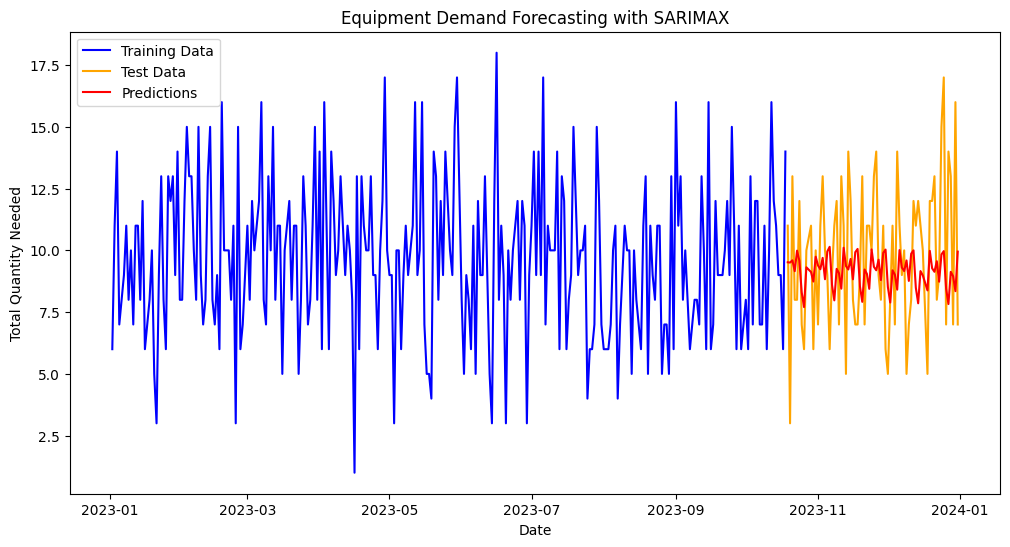

In [96]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Sample DataFrame for demonstration
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_size = len(date_range)

# Simulating some demand data with outliers
demand_data = np.random.poisson(10, data_size)

# Introduce outliers at intervals of 50
num_outliers = data_size // 50
outlier_indices = np.arange(0, data_size, 50)

# Ensure the outlier_indices does not exceed the demand_data length
outlier_indices = outlier_indices[outlier_indices < data_size]

# Assign outlier values
outlier_values = np.random.randint(50, 100, size=len(outlier_indices))  # Match the size to outlier_indices
demand_data[outlier_indices] = outlier_values  # Introduce outliers

# Creating the DataFrame
daily_equipment_demand = pd.DataFrame({
    'date': date_range,
    'total_quantity_needed': demand_data
})

# Outlier Detection using IQR Method
Q1 = daily_equipment_demand['total_quantity_needed'].quantile(0.25)
Q3 = daily_equipment_demand['total_quantity_needed'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_demand = daily_equipment_demand[(daily_equipment_demand['total_quantity_needed'] >= lower_bound) &
                                          (daily_equipment_demand['total_quantity_needed'] <= upper_bound)]

# Set date as index for time series analysis
filtered_demand.set_index('date', inplace=True)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(filtered_demand) * 0.8)
train, test = filtered_demand[:train_size], filtered_demand[train_size:]

# Fit the SARIMAX model
model = SARIMAX(train['total_quantity_needed'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust orders as needed
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
mae = mean_absolute_error(test['total_quantity_needed'], predictions)
mse = mean_squared_error(test['total_quantity_needed'], predictions)

# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['total_quantity_needed'], label='Training Data', color='blue')
plt.plot(test.index, test['total_quantity_needed'], label='Test Data', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('Equipment Demand Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Total Quantity Needed')
plt.legend()
plt.show()


In [99]:
# Evaluate the model
mae = mean_absolute_error(test['total_quantity_needed'], predictions)
mse = mean_squared_error(test['total_quantity_needed'], predictions)

# Calculate R-squared
ss_res = np.sum((test['total_quantity_needed'] - predictions) ** 2)
ss_tot = np.sum((test['total_quantity_needed'] - np.mean(test['total_quantity_needed'])) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Calculate Percentage Accuracy
average_actual = np.mean(test['total_quantity_needed'])
accuracy_percentage = (1 - (mae / average_actual)) * 100  # Percentage accuracy

# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')
print(f'Percentage Accuracy: {accuracy_percentage:.2f}%')

Mean Absolute Error: 2.549018838632777
Mean Squared Error: 9.481099698457195
R-squared: 1.0
Percentage Accuracy: 73.97%
